# 확률적 경사 하강법(SGD : Stochastic Gradient Descent)
- 머신러닝에도 많이 사용하지만 실질적으로는 딥러닝에서 많이 사용한다.
- 데이터가 추가되었을 경우 머신러닝 처리 방법

1. 새로운 데이터로 모델을 추가하여 새롭게 학습하여 처리한다.
2. 추가된 갯수만큼 기존의 데이터를 버리고 사용한다.
3. 기존 모델을 수정하면서 사용한다. '점진적 학습방법'

- 데이터가 추가됐을 경우에도 새로운 모델을 만들지 않고 기존의 모델을 수정하면서 사용할 수 있는 방법
- 머신러닝 및 딥러닝 알고리즘을 훈련하거나 최적화하는 방법이지 머신러닝 딥러닝의 모델은 아니다.
- {확률적 : 랜덤}, {경사 : 기울기}
- 곡선의 최적점을 찾기 위해서 기울기를 기준으로 조금씩 이동하면서 최적점을 찾는 방법

train data에서    
- 한개를 꺼낸다 : 확률젹 경사 하강법   
- 4개 정도 꺼낸다 : mini batch 경사 하강법   
- 다 꺼낸다 : batch 경사 하강법
> 이런 식으로 조금씩 경사를 따라서 최적값을 향해 이동한다.   
> 데이터를 다 꺼냈을 경우 data refill을 한다 : Epoch

- Epoch : 훈련 세트를 다 사용했을 경우의 단계
- 미니배치(mini batch) 경사 하강법의 갯수 : Hyper Parameter, 보통은 2의 배수로
- 배치 경사 하강법 : 샘플을 한 번에 꺼내면 하드웨어에 부담을 줄 수 있어서 거의 사용하지 않는다.

### 손실함수(비용함수) : 예측값과 정답의 오차값
- 머신러닝 알고리즘이 에러율을 측정하는 함수
- 손실함수 값이 적은 것이 정확도가 높은 것이다.
- 확률적 경사 함수를 통해서 손실함수값이 낮은 것을 찾는다.
- 분류함수인 경우에 정확도를 사용하는데, 이 정확도의 값은 미분할 수가 없어서(연속성이 없음) 손실함수로 사용 불가하다.
- 분류함수인 경우에 로지스틱 손실함수, 이진크로스엔트로피 손실함수를 사용한다.

In [1]:
# 데이터 시각화
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
import pandas as pd

In [3]:
fish = pd.read_csv('../data/fishes.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
# Feature
fish_input = fish.drop('Species', axis=1).to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [6]:
# Target
fish_target = fish.Species.to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [8]:
# Train, Test 분리
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [10]:
# 표준화 시키기
from sklearn.preprocessing import StandardScaler

In [11]:
# 경사 하강법을 사용하는 경우 샘플의 크기때문에 경사의 각도가 바뀔 수 있으므로, 각 Feature의 Scale을 표준점수로 변경해야 한다.
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

---
### 확률적 경사 하강법의 분류 알고리즘 적용

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sc = SGDClassifier(
    loss='log', # 손실함수 : 로지스틱
    max_iter=10, # 반복횟수 : 10 >> Epoch
    random_state=42
)
sc.fit(train_scaled, train_target)
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

train score : 0.773109243697479
test score : 0.775


> score가 77점대로 높지 않으며, 과소적합이다.   
>> partial_fit을 사용한다 : 기존 w와 b의 계수값을 유지한 채 Update하는 방법   
> 다시 그냥 fit을 사용하면 기존의 학습내용을 모두 버리기 때문이다.

In [14]:
sc.partial_fit(train_scaled, train_target)
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

train score : 0.8151260504201681
test score : 0.85


In [15]:
sc.partial_fit(train_scaled, train_target)
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

train score : 0.7815126050420168
test score : 0.8


In [16]:
sc.partial_fit(train_scaled, train_target)
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

train score : 0.8067226890756303
test score : 0.8


In [17]:
sc.partial_fit(train_scaled, train_target)
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

train score : 0.8487394957983193
test score : 0.85


> 처음의 점수보다 증가했다 : 기존 학습내용에 추가로(이어서) 학습내용을 update 했기 때문   
> 이와 같이 점진적으로 정확도를 높이는 것이 확률적 경사 하강법이다.   
> 그리고 여전히 과소적합이다. 과대적합이 되도록 해보자.

---
### Epoch와 과대/과소 적합
- 규제값이 작아지면 과대적합이 된다.
- 조기종료(Early Stopping) : 적합한 Epoch의 위치를 찾으면 종료한다.

In [19]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [21]:
train_score = []
test_score = []

for _ in range(0, 300): # _는 변수 활용이 필요 없이 반복할 때 사용
    sc.partial_fit(train_scaled, train_target, classes=classes)
    # partial_fit을 하기 전에 fit을 사용하지 않았으면, classes를 정의해야 부분 수정이 아닌 전체 수정 작업이 시행된다.
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

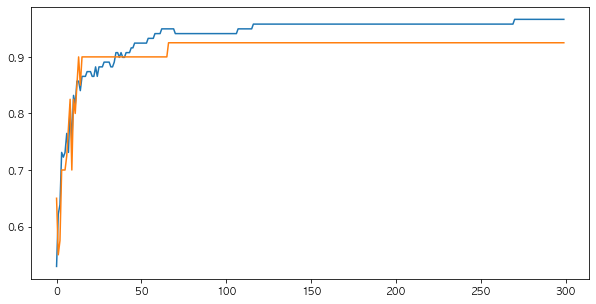

In [22]:
# 그래프로 그려보기
plt.figure(figsize=(10,5))
plt.plot(train_score)
plt.plot(test_score)
plt.show()

> 100 정도의 epoch가 좋은 것 같다.

In [23]:
# 새로운 시작
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
# tol : 조기종료 시점, 현재는 정지 기준이 없고 반복기간 안의 최적의 손실값보다 큰 경우 조기종료된다.
sc.fit(train_scaled, train_target)
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

train score : 0.957983193277311
test score : 0.925


In [37]:
# 조기종료 시점 적용
sc = SGDClassifier(loss='log', max_iter=100, tol=1.0e-3, random_state=42)
sc.fit(train_scaled, train_target)
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

train score : 0.8403361344537815
test score : 0.8


> 그래프가 최고점보다 아래에서 교차할 경우 조기종료가 교차할 때 되어서 최고점까지 도달하지 못한다.

---
### SVM을 이용한 확률적 경사 하강법

In [38]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # hinge : SVM
sc.fit(train_scaled, train_target)
print('train score :', sc.score(train_scaled, train_target))
print('test score :', sc.score(test_scaled, test_target))

train score : 0.9495798319327731
test score : 0.925
